In [2]:
VERSION = '01_v1_27'
MODEL = 'microsoft/deberta-v3-base'
#'microsoft/deberta-base'
#'microsoft/deberta-v3-large'
LR = 2e-5 #8e-6
HEAD_LR = 2e-4 #2e-5 #8e-6 
SEED = 100
TRN_BS = 8
VAL_BS = 8
ACCUM_STEP = 1
HIDDEN_DROP_PROB = 0
P_DROP = 0
RNN = 'none'
WARMUP_RATIO = 0.1
HEAD = 'simple'
AUG = 'false'
MIXUP_ALPHA = 0
P_AUG = 0
AUG_STOP_EPOCH = 0
MSD = 'false'
MULTI_LAYERS = 1
EVAL_STEP = -1
NUM_LABELS = 6
NUM_LABELS_2 = -1
FP16 = 'true'
WD = 0.01
FREEZE = 'false'
MULTI_TASK = 'false' 
W_MT = 0 
AWP = 'false'
AWP_LR = 0
AWP_EPS = 0
AWP_START_EPOCH = -1
#PRETRAINED_DETECTOR_PATH = f'../../input/tascj/result/deberta_base_fold0.pth'
PRETRAINED_DETECTOR_PATH = 'none' #f'../../05_Detection/exp/result/05_v2_09/model_seed100_fold0_swa.pth'
MASK_PROB = 0 #0.8
MASK_RATIO = 0 #0.3
SCHEDULER = 'cosine_hard'
CP = 'false'
WINDOW_SIZE = -1 #512
INNER_LEN = -1 #384
EDGE_LEN = -1 #64
MAX_LEN = 512

GRAD_CLIP = 1

LOSS = 'smoothl1'#'mse'

# Pseudo

In [3]:
FOLD = 0
INPUT_PATH = '../../input/feedback-prize-english-language-learning/'
FOLD_PATH = '../../00_EDA/00_v1_02/result/'

UNLABELED_DATA_PATH = '../../00_EDA/00_v1_05/result/similar_df.csv'

!python ../$VERSION/pseudo_label.py --model $MODEL --version $VERSION \
--fold_path $FOLD_PATH --fold $FOLD --seed $SEED --test_batch_size $VAL_BS \
--rnn $RNN --loss $LOSS --mt $MULTI_TASK --num_labels $NUM_LABELS --loss $LOSS \
--window_size $WINDOW_SIZE --inner_len $INNER_LEN --edge_len $EDGE_LEN --max_length $MAX_LEN  \
--unlabeled_data_path $UNLABELED_DATA_PATH

torch 1.10.1
2022-09-18 21:07:55.783480: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.2/lib64:
2022-09-18 21:07:55.783515: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
test_df.shape =  (3351, 2)
test_df.columns =  Index(['essay_id', 'full_text'], dtype='object')
100%|█████████████████████████████████████████| 419/419 [02:52<00:00,  2.43it/s]
essay_ids.shape =  (3351,)
preds.shape =  (3351, 6)


In [ ]:
for FOLD in [1,2,3,4]:
    !python ../$VERSION/pseudo_label.py --model $MODEL --version $VERSION \
    --fold_path $FOLD_PATH --fold $FOLD --seed $SEED --test_batch_size $VAL_BS \
    --rnn $RNN --loss $LOSS --mt $MULTI_TASK --num_labels $NUM_LABELS --loss $LOSS \
    --window_size $WINDOW_SIZE --inner_len $INNER_LEN --edge_len $EDGE_LEN --max_length $MAX_LEN  \
    --unlabeled_data_path $UNLABELED_DATA_PATH

In [4]:
import pandas as pd
pseudo_fold0_df = pd.read_csv('result/01_v1_27/pseudo_fold0.csv')
pseudo_fold0_df.head(2)

,essay_id,full_text,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,000E6DE9E817,Dear: Principal\n\nI am arguing against the po...,000E6DE9E817,3.022409,3.010984,3.240413,3.039336,2.951416,3.229907
1,0056F3D261D5,Millions of students from various cultures and...,0056F3D261D5,4.550495,4.445793,4.546539,4.551374,4.444950,4.447504


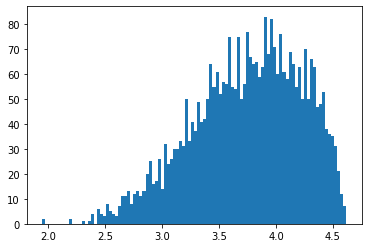

In [5]:
cols = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']

pseudo_fold0_df['mean'] = pseudo_fold0_df[cols].mean(axis=1)

import matplotlib.pyplot as plt
plt.hist(pseudo_fold0_df['mean'].values, bins=100);